## INTRODUCTION

In this project we will analyze the biodiversity data in certain national parks, the data is divided into 2 files:

`Observations.csv` and `Species_info.csv`

Data will be analyzed, traced and an attempt will be made to answer the following questions:

- What is the distribution of the State of Conservation in Species?
- Is it probable that certain species are in danger of extinction?
- Are the differences between the species and their conservation status significant?
- What is the distribution of the species in each park?

The data worked (`Observations.csv` and `Species_info.csv`) in this project was provided by codecademy.com

## Objectives of the project:

The objective is to ensure the survival of the species at risk, this in order to maintain a level of biodiversity in the parks mentioned in the data. The main thing I have to do is understand the characteristics and conservation status of the species, as well as its relationship to national parks.

These questions will be asked in the project:

- What is the distribution of the conservation status of the species?
- What is the distribution of the species in the parks?
- Are certain types of species likely to be in danger of extinction?
- Are the differences between species and their conservation status significant?
- What animal is more frequent and what is its distribution in the parks?

## Analysis:

Metrics that will be used in the project:

- Distribution
- Counts
- Relationship between species
- Conservation status of the species
- Observations of species in parks

## Import python modules:

First import the essential modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

`Observations.csv` and `Species_info.csv` are read in `DataFrames` called `observations` and `species`

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

### Information of `observations`

In [3]:
display(observations.head())
print('')
observations.info()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Information of `species`

In [4]:
display(species.head())
print('')
species.info()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


## Explore the Data

### Species:

First we want to know the number of unique species, how many categories does the data frame have? And which are they? How many types of conservation status are there? and which are they?

In [5]:
print('The number of unique species is:', species.scientific_name.nunique())

The number of unique species is: 5541


In [6]:
print('The number of categories is:', species.category.nunique())
print('')
print('The categories are:', species.category.unique())

The number of categories is: 7

The categories are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
print('The number of status conservation in the data is:', species.conservation_status.nunique())
print('')
print('The status conservation are:', species.conservation_status.unique())

The number of status conservation in the data is: 4

The status conservation are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


*Since I noticed that the 'conservation status' column contains 191 non null, I did a test to determine if the species that did not have conservation status were out of danger and they were.*

*I created a function that shows the name of 5 random species and their status. This is my hypothesis, if the species has a NaN status, it means that it is out of danger, and I will take 5 species randomly several times and google their status, if they are all out of danger and I have the NaN status, my hypothesis will be true.*

In [8]:
def random_test(df, column_cn, column_cs):
    random_names = []
    random_status = []
    for i in range(5):
        name = np.random.choice(df[column_cn].values)
        status = df[column_cs][df[column_cn] == name].values
        random_names.append(name)
        random_status.append(status)
    df_test = pd.DataFrame({'Species Name': random_names, 'Status Conversation': random_status})
    return display(df_test)
    
    
random_test(species, 'common_names', 'conservation_status')

,Species Name,Status Conversation
0,Campylopus Moss,"[nan, nan]"
1,Beautiful Fleabane,[nan]
2,"Great Blue Lobelia, Great Lobelia",[nan]
3,"Gill-Over-The-Ground, Ground Ivy",[nan]
4,"Round Leaf Watercress, Round-Leaf Water Cress",[nan]


*Now that we are sure that the Nan values mean that the species is out of danger, I will make 2 data frames that shows the number of species that each conservation status contains and the number of species that each category contains.*

In [9]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [10]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

### Observations:

Now we want to see the number of unique species in this data, the number of unique parks and what they are, and finally the sum of the observations. Note: this data does not contain nan values.

In [11]:
print('The number of species that each park contain is:', observations.scientific_name.nunique())
print('')
print('The number of the parks is:', observations.park_name.nunique())
print('')
print('The parks are:', observations.park_name.unique())
print('')
print('The sum of the all observations is:', np.sum(observations.observations))

The number of species that each park contain is: 5541

The number of the parks is: 4

The parks are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

The sum of the all observations is: 3314739


## Analisys

Since there are a certain number of nan values in the conservation status column, we will name them as 'Out of danger'

In [12]:
species.fillna('Out of danger', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Out of danger         5633
Species of Concern     161
Threatened              10
dtype: int64

In [13]:
df_category_status = species[species.conservation_status != 'Out of danger'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
display(df_category_status)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


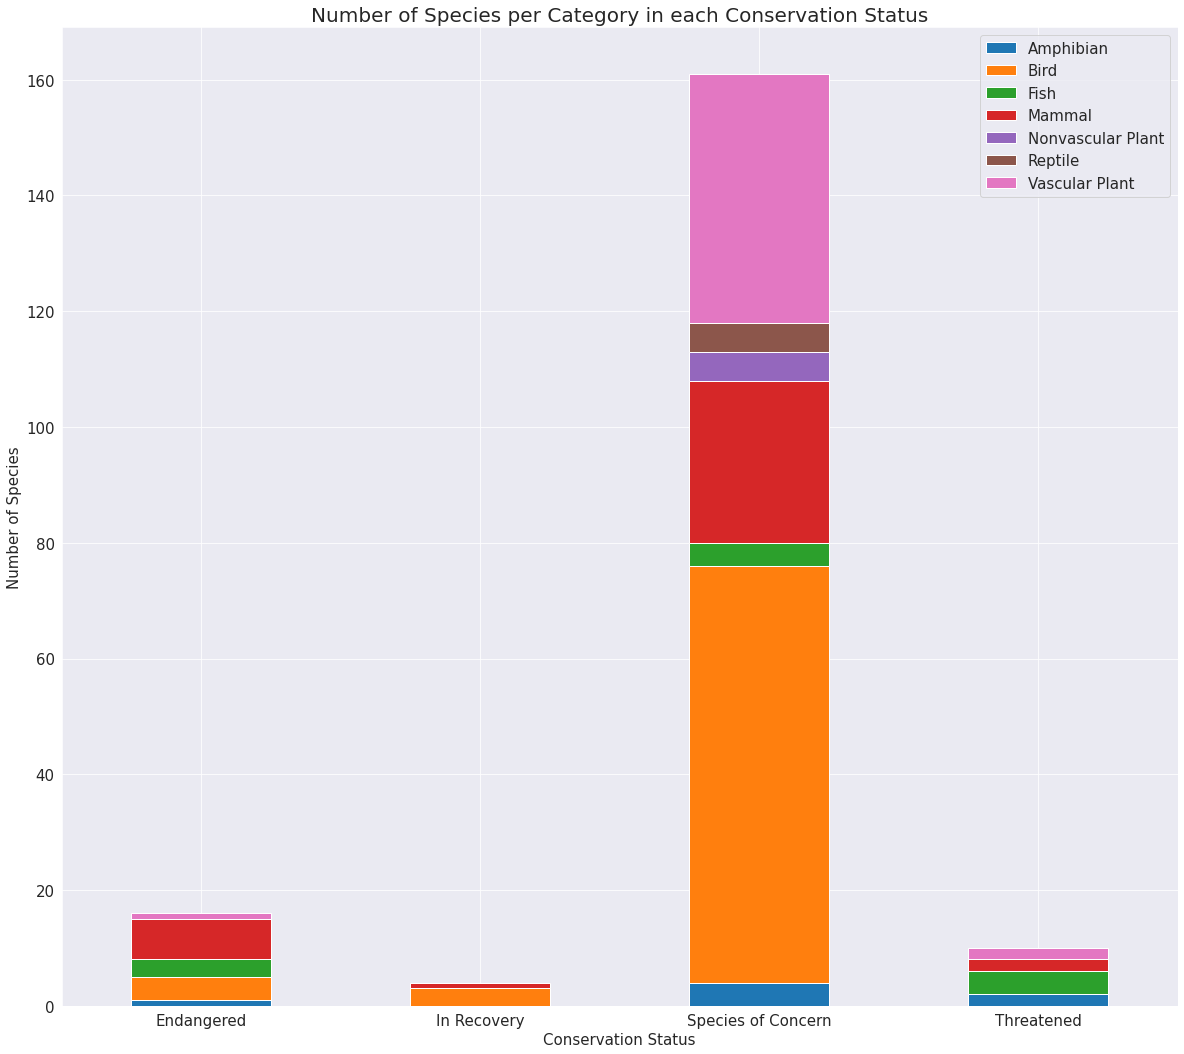

In [14]:
sns.set_style('darkgrid')
ax = df_category_status.plot(kind = 'bar', figsize=(20,18), stacked = True)
plt.xticks(rotation = 0)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Number of Species per Category in each Conservation Status')
plt.legend(prop={'size':15})
for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
ax.title.set_fontsize(20)
plt.show()

In [15]:
species['protected'] = species.conservation_status != "Out of danger"

In [16]:
protected_counts = species.groupby(["category", "protected"]).scientific_name.nunique().reset_index().pivot(columns="protected", index="category", values="scientific_name").reset_index()
protected_counts.columns = ["Category", "Not Protected", "Protected"]
display(protected_counts)

,Category,Not Protected,Protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [17]:
protected_counts["Percent protected"] = protected_counts.Protected/(protected_counts.Protected + protected_counts["Not Protected"])*100

display(protected_counts)

,Category,Not Protected,Protected,Percent protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical Significance
In this part I will create a function that takes the protected and not protected values of 2 categories to do a contingency chi2 test and obtain the P value and determine if that pair has a significant difference or not.

In [18]:
from scipy.stats import chi2_contingency
def contingency(data, specie1, specie2):
    result = ""
    protected1 = int(data["Protected"][data.Category == specie1])
    not_protected1 = int(data["Not Protected"][data.Category == specie1])
    protected2 = int(data["Protected"][data.Category == specie2])
    not_protected2 = int(data["Not Protected"][data.Category == specie2])
    test = np.array([[protected1, not_protected1],[protected2, not_protected2]])
    chi2, pval, dot, exp = chi2_contingency(test)
    #This is the threshold of significance 0.05
    if pval <= 0.05:
        result = "they have significance"
    else:
        result = "they don't have significance"
    return "The P-value for the test of {s} & {d} is: {p}, therefore {r}".format(s = specie1, d = specie2, p = pval.round(5), r = result)

print(contingency(protected_counts, "Mammal", "Bird"))
print(contingency(protected_counts, "Mammal", "Reptile"))
print(contingency(protected_counts, "Vascular Plant", "Nonvascular Plant"))
print(contingency(protected_counts, "Mammal", "Amphibian"))
print(contingency(protected_counts, "Mammal", "Fish"))
print(contingency(protected_counts, "Bird", "Fish"))
print(contingency(protected_counts, "Reptile", "Fish"))
print(contingency(protected_counts, "Bird", "Reptile"))

The P-value for the test of Mammal & Bird is: 0.68759, therefore they don't have significance
The P-value for the test of Mammal & Reptile is: 0.03836, therefore they have significance
The P-value for the test of Vascular Plant & Nonvascular Plant is: 0.66234, therefore they don't have significance
The P-value for the test of Mammal & Amphibian is: 0.12758, therefore they don't have significance
The P-value for the test of Mammal & Fish is: 0.05615, therefore they don't have significance
The P-value for the test of Bird & Fish is: 0.07668, therefore they don't have significance
The P-value for the test of Reptile & Fish is: 0.74065, therefore they don't have significance
The P-value for the test of Bird & Reptile is: 0.05314, therefore they don't have significance


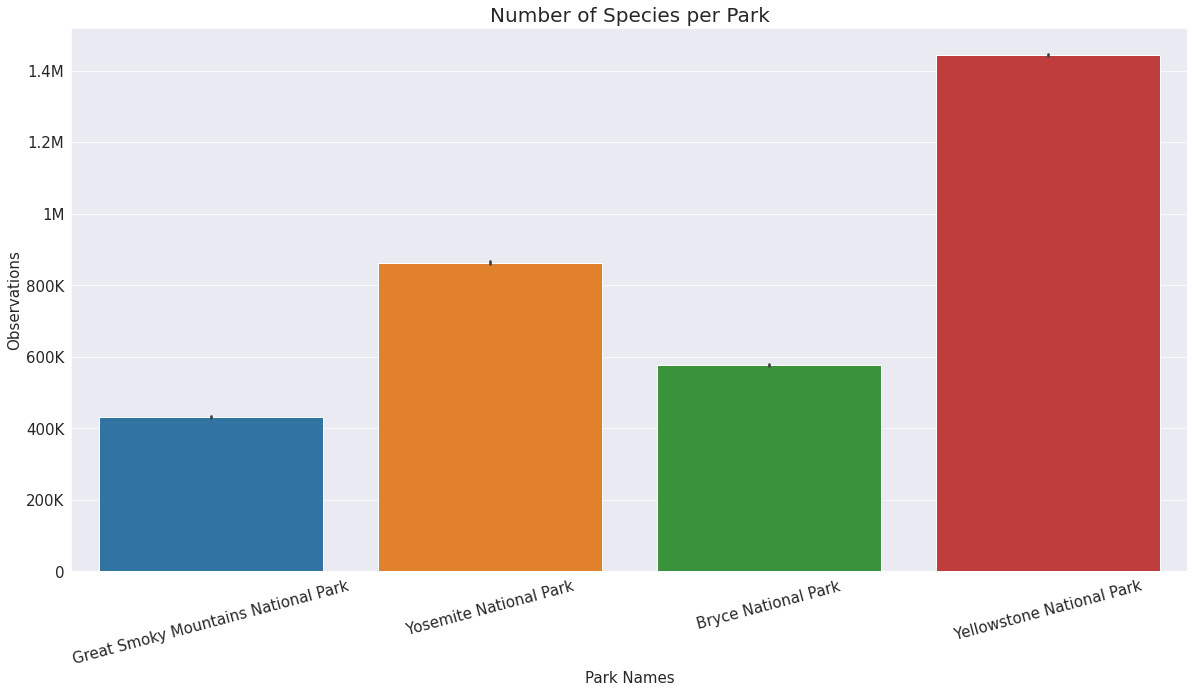

In [19]:
f, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(data=observations, x='park_name', y='observations', estimator=np.sum)
ax1.set_xticks([0, 1, 2, 3])
plt.xticks(rotation=15)
ax1.set_xlabel('Park Names')
ax1.set_ylabel('Observations')
ax1.set_title('Number of Species per Park')
ax1.set_yticks([0.0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000])
ax1.set_yticklabels([0, "200K", "400K", "600K", "800K", "1M", "1.2M", "1.4M"])
for item in ([ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)
ax1.title.set_fontsize(20)
plt.show()

## CONCLUSION

- The distribution of the conservation status in Species is: 

We were able to see that very few species have a conservation status and that the rest that have an is_null value is because they are not endangered and are not protected, the distribution is 5,633 non-endangered species and 191 protected species. with a total of 5,824 species, being Mammals, Birds and Vascular Plants with the highest species within the number of protected species. 



- Is it probable that certain species are in danger of extinction? 

Yes, Mammal and Birds had the highest percents, Mammal with 17.04 and Birds with 15.36.



- Are the differences between species and their conservation status significant? 

'Mammals' and' Birds' have no significant difference, and 'Mammals' only has a significant difference with' Reptile ', and although the difference is very little with the threshold of significance' Birds' and 'Reptile' have no significant difference, ' Reptile 'and' Mammals' is the only pair that contains a fairly significant difference.



- What is the distribution in the parks? 

We can clearly see that "Yellowstone National Park" has an immense difference with the other 3 parks, and the one that is closest to it is "Yosemite National Park", and the one that is furthest from having the same amount of species is "Great Smoky Mountains National Park", this graph is the total of observations of species that have been made by each park.